# Explanatory Data Analysis and Data Preprocessing

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pingouin as pg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [3]:
# Set the pandas option to display all columns when printing the DataFrame
# This ensures that no columns are hidden, which is useful when dealing with wide DataFrames
pd.set_option('display.max_columns',None)

In [4]:
# Load the cleaned CTG dataset from a CSV file into a pandas DataFrame
file_path = "data/CTG_clean.csv"
CTG = pd.read_csv(file_path)

## Target Variables

In [67]:
# Count the occurrences of each unique value in 'FHR_Class'
fhr_class_counts = CTG['FHR_Class'].value_counts()
fhr_class_df = pd.DataFrame(fhr_class_counts).reset_index()
fhr_class_df.columns = ['FHR Class', 'Count']
# Calculate the poportion of each unique value in 'HFR_Class'
fhr_class_proportion = CTG['FHR_Class'].value_counts(normalize=True).round(2)
fhr_class_p_df = pd.DataFrame(fhr_class_proportion).reset_index()
fhr_class_p_df.columns = ['FHR_Class', 'Proportion']
# Count the occurrences of each unique value in 'Fetal_State'
fetal_state_counts = CTG['Fetal_State'].value_counts()
fetal_state_df = pd.DataFrame(fetal_state_counts).reset_index()
fetal_state_df.columns = ['Fetal State', 'Count']
# Calculate the poportion of each unique value in 'Fetal_State'
fetal_state_proportion = CTG["Fetal_State"].value_counts(normalize=True).round(2)
fetal_state_p_df = pd.DataFrame(fetal_state_proportion).reset_index()
fetal_state_p_df.columns = ['Fetal State', 'Proportion']
print(fhr_class_df)
print(fhr_class_p_df)
print(fetal_state_df)
print(fetal_state_p_df)

   FHR Class  Count
0        2.0    575
1        1.0    383
2        6.0    332
3        7.0    252
4       10.0    194
5        8.0    107
6        4.0     81
7        5.0     72
8        9.0     68
9        3.0     51
   FHR_Class  Proportion
0        2.0        0.27
1        1.0        0.18
2        6.0        0.16
3        7.0        0.12
4       10.0        0.09
5        8.0        0.05
6        4.0        0.04
7        5.0        0.03
8        9.0        0.03
9        3.0        0.02
   Fetal State  Count
0          1.0   1648
1          2.0    292
2          3.0    175
   Fetal State  Proportion
0          1.0        0.78
1          2.0        0.14
2          3.0        0.08


## Distribution Analysis

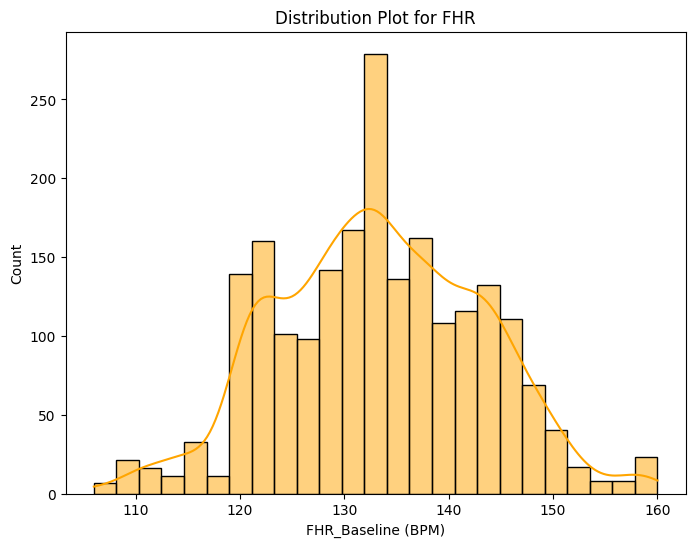

In [8]:
# Create a histogram plot with a Kernel Density Estimate (KDE) line for the 'FHR_Baseline' column
plt.figure(figsize=(8,6))  
sns.histplot(data=CTG, x='FHR_Baseline', kde=True, color='orange')
plt.title('Distribution Plot for FHR')
plt.xlabel('FHR_Baseline (BPM)')

plt.show()

# Create a histogram plot with a Kernel Density Estimate (KDE) line for the 'FHR_Baseline' column
plt.figure(figsize=(8,6))  
sns.histplot(data=CTG, x='FHR_Baseline', kde=True, color='orange')
plt.title('Distribution Plot for FHR')
plt.xlabel('FHR_Baseline (BPM)')

plt.show()

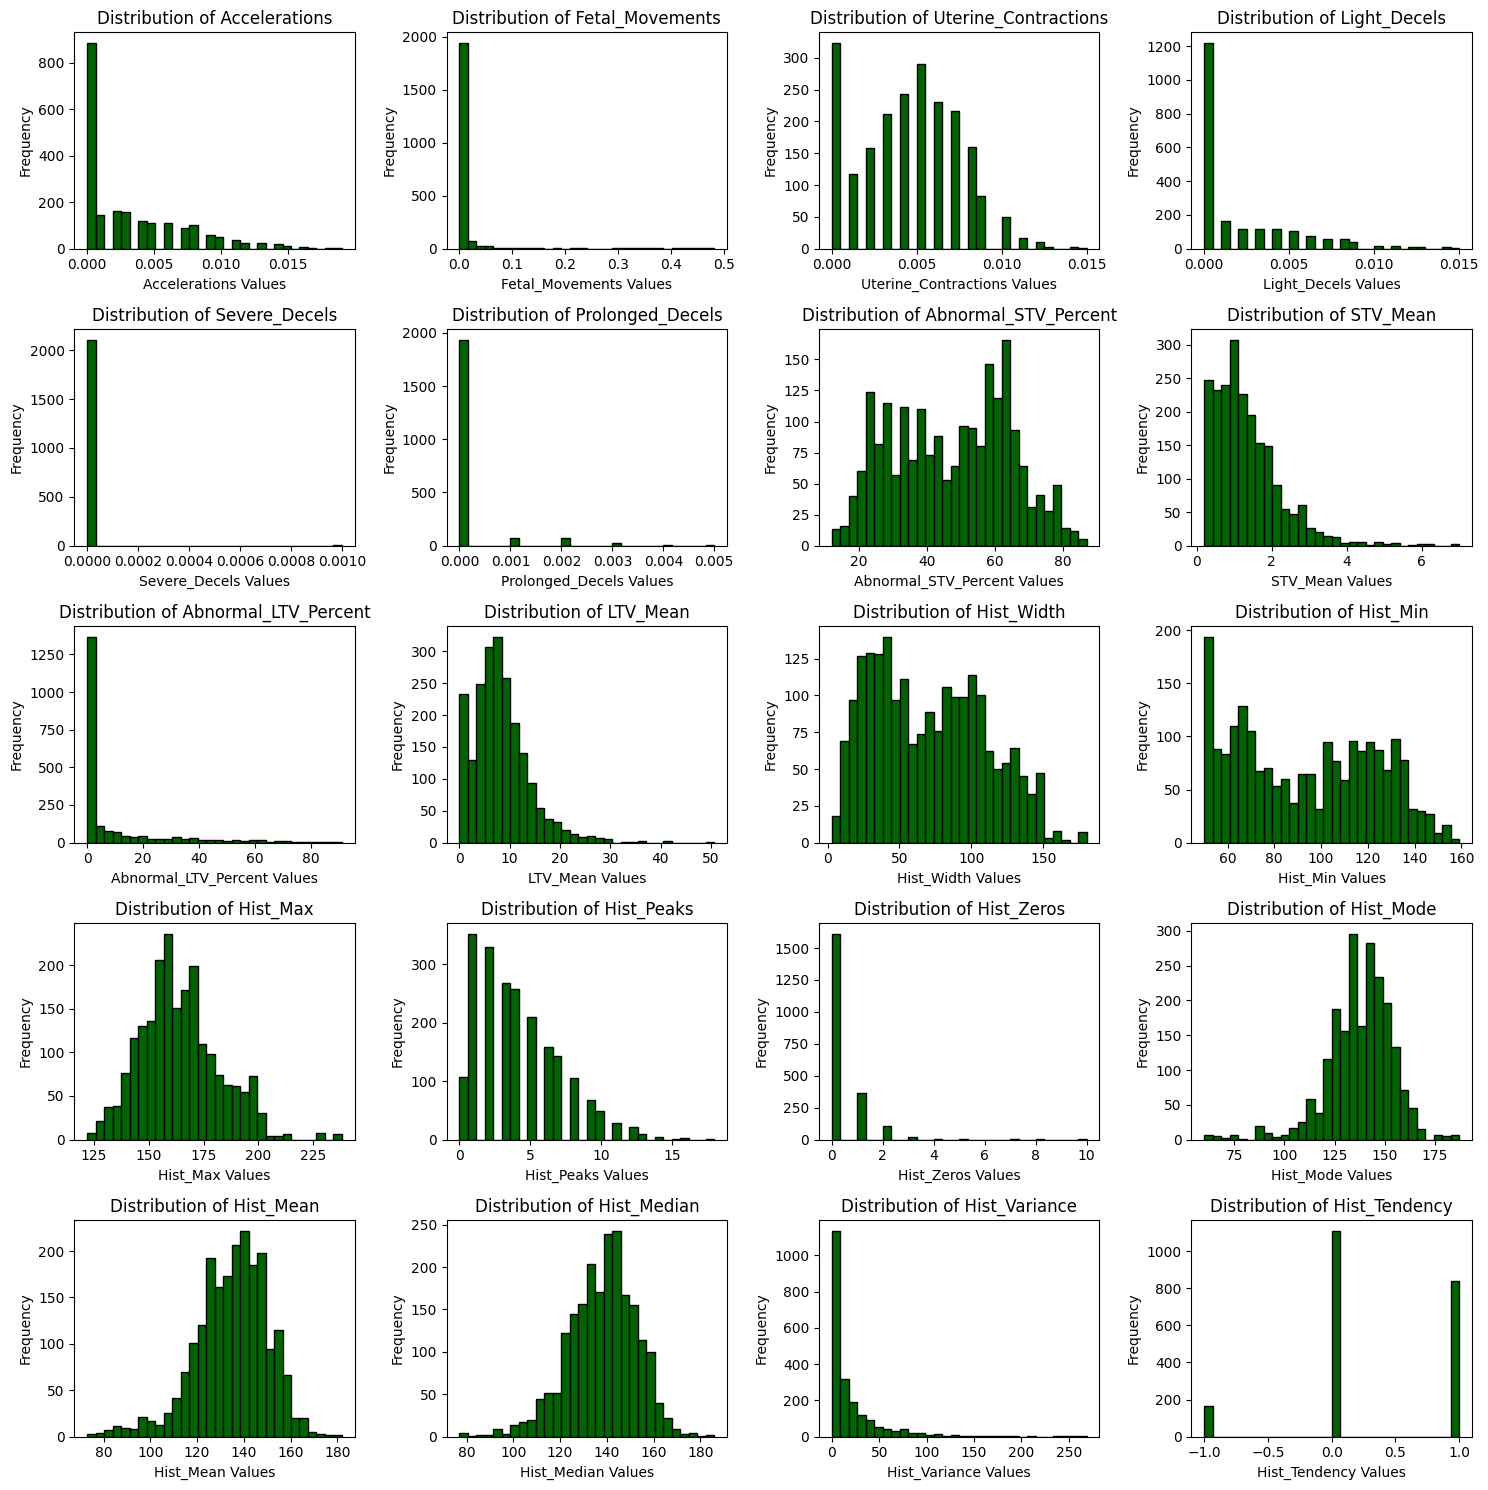

In [9]:
# Drop the 'FHR' column to exclude it from the plots
columns_to_plot = CTG.drop(columns=["FHR_Baseline", "Fetal_State","FHR_Class"]).columns

# Calculate the number of rows and columns for the grid of subplots
n_cols = 4  # Number of plots per row
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Number of rows needed

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Loop through each column and create a histogram on the corresponding subplot
for i, column in enumerate(columns_to_plot):
    axes[i].hist(CTG[column], bins=30, color='darkgreen', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=12)  # Set the title
    axes[i].set_xlabel(f'{column} Values', fontsize=10)  # Set the x-axis label
    axes[i].set_ylabel('Frequency', fontsize=10)  # Set the y-axis label

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlapping plots
plt.tight_layout()
plt.show()

## Boxplot Analyses

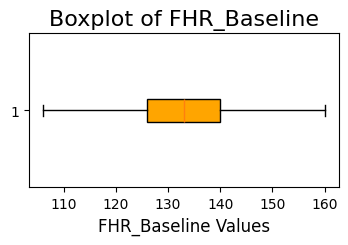

In [11]:
# Create a boxplot of FHR_Baseline to see if it has any outliers
plt.figure(figsize=(4,2))
plt.boxplot(CTG['FHR_Baseline'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Boxplot of FHR_Baseline', fontsize=16)
plt.xlabel('FHR_Baseline Values', fontsize=12)
plt.show()

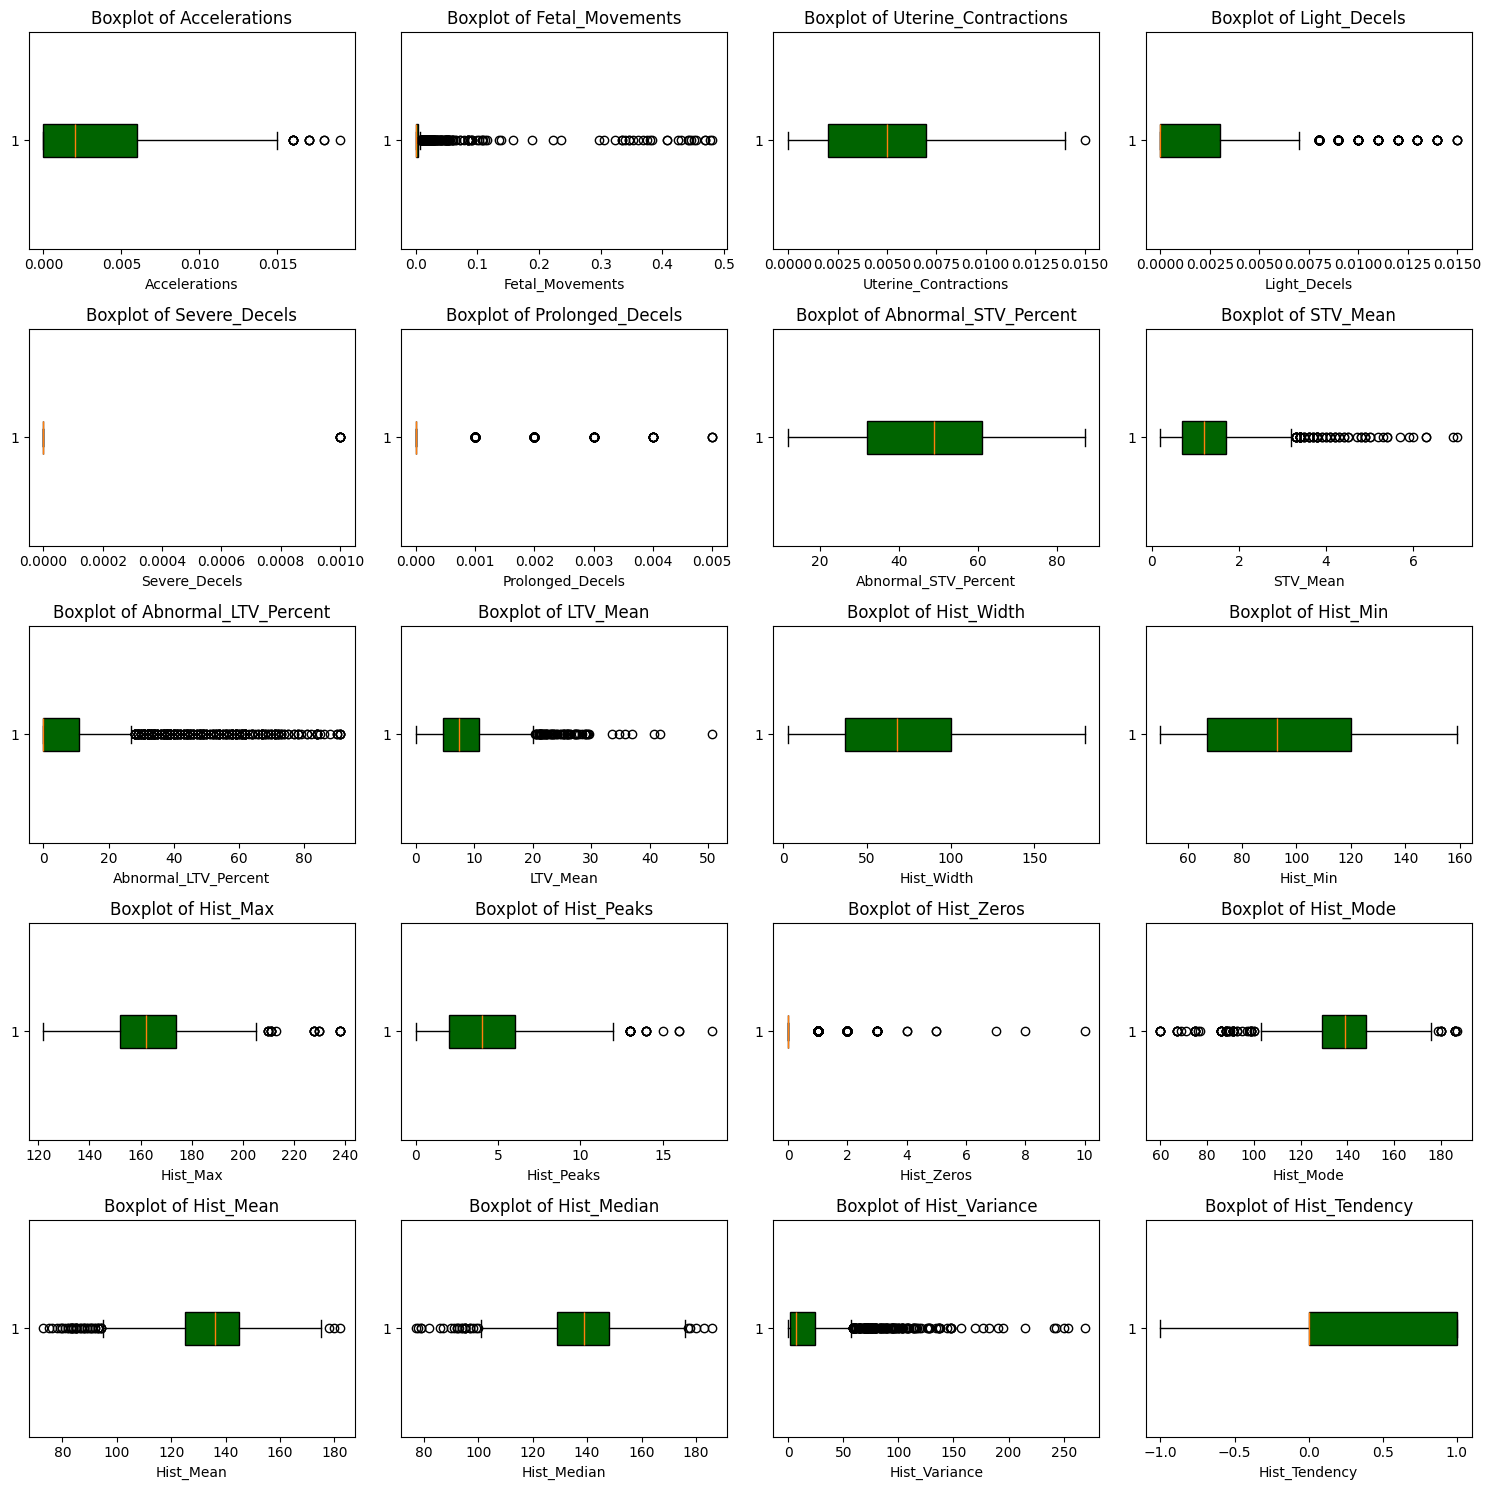

In [12]:
# Create a figure and a grid of subplots to see the rest of the dataset and its outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Loop through each column and create a boxplot on the corresponding subplot
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(CTG[column], vert=False, patch_artist=True, boxprops=dict(facecolor='darkgreen'))
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)  # Set the title
    axes[i].set_xlabel(column, fontsize=10)  # Set the x-axis label

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout to avoid overlapping plots
plt.tight_layout()
plt.show()

## Correlation Analysis

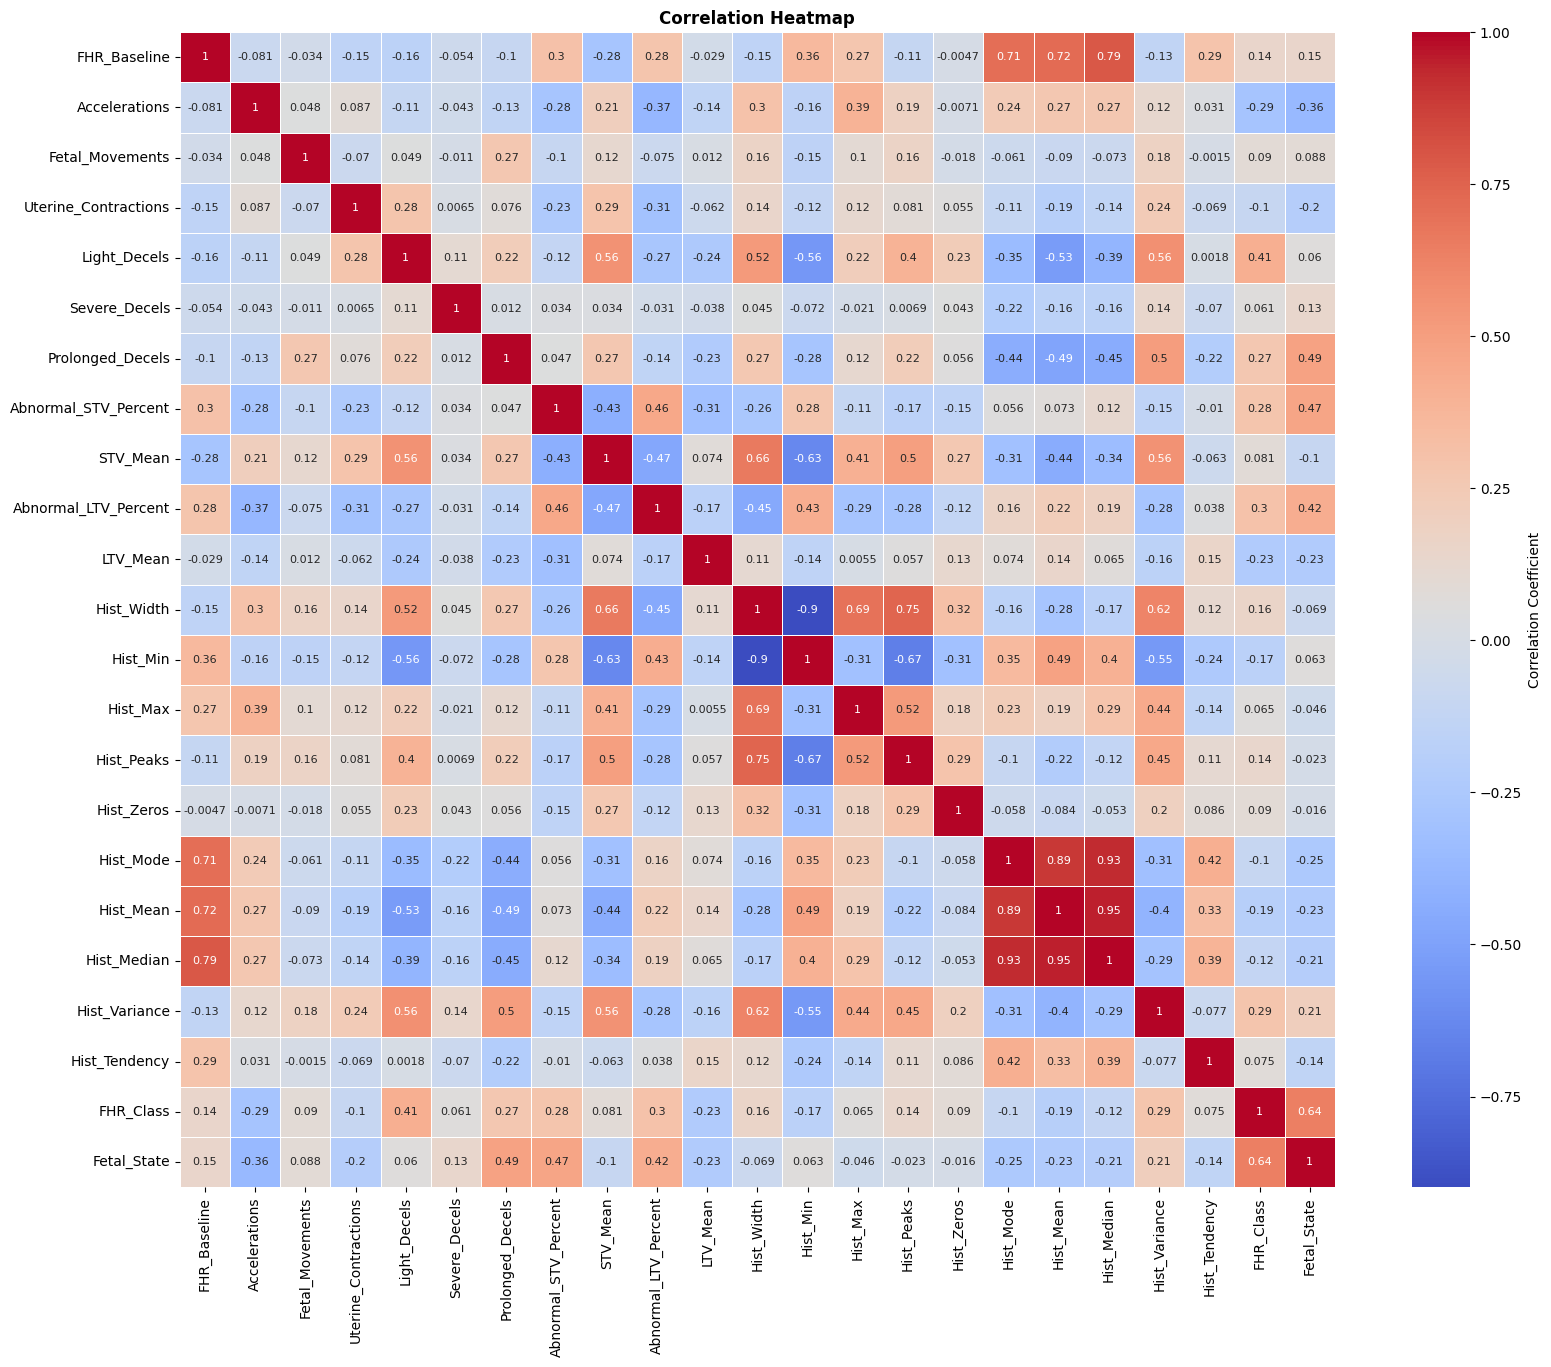

In [13]:
# Create the correlation matrix
corr_matrix = CTG.corr()
# Create the correlation heatmap
plt.figure(figsize=(20, 15))

# Replotting with different settings
sns.heatmap(
    data=corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    annot_kws={"size": 8}, 
    cbar_kws={'label': 'Correlation Coefficient'}, 
    linewidths=.5, 
    square=True  
)

plt.title('Correlation Heatmap', weight='bold')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## FHR Baseline vs Histogram Mean, Mode and Median & Histogram Min vs Histogram Width

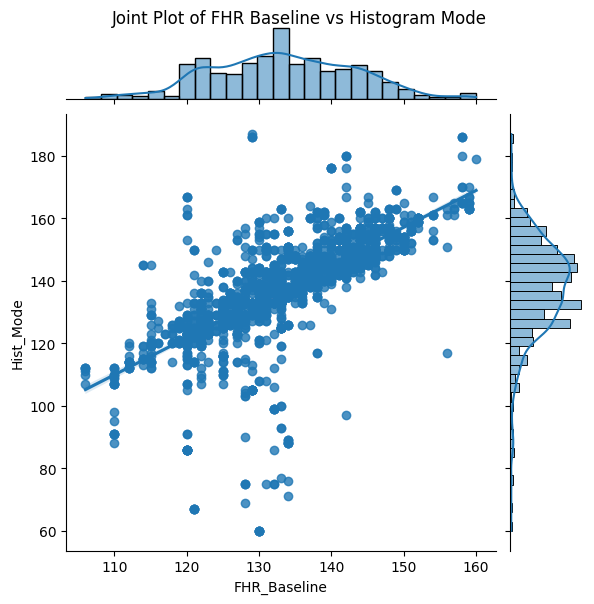

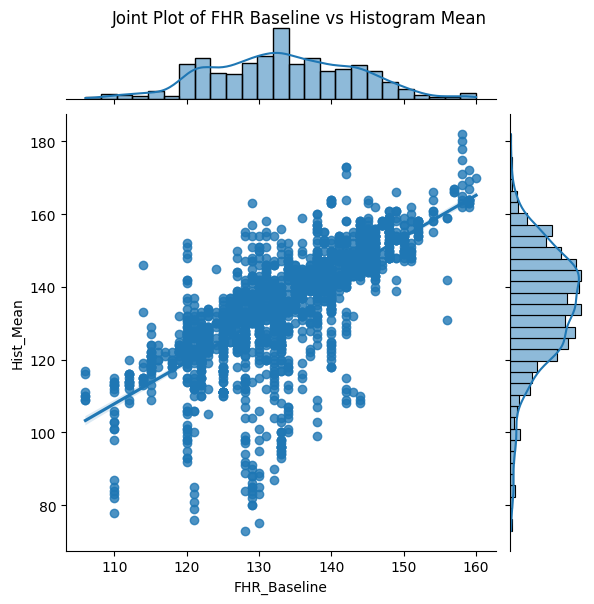

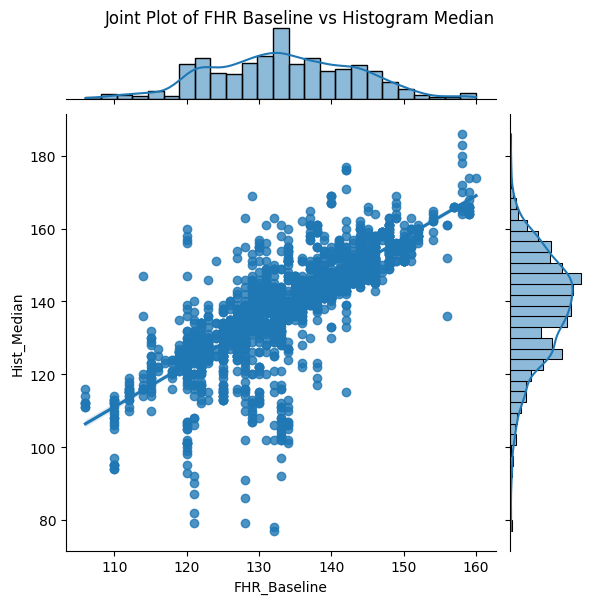

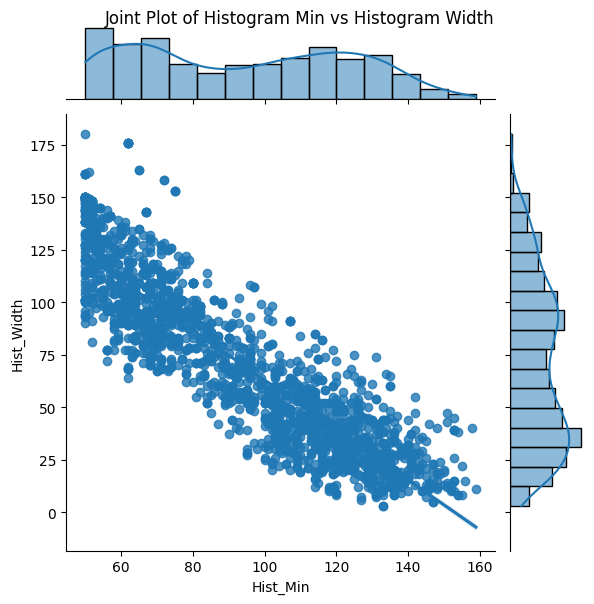

In [15]:
# Scatter plot for FHR_Baseline vs Hist_Mode with regression line
sns.jointplot(x=CTG['FHR_Baseline'], y=CTG['Hist_Mode'], kind='reg')
plt.suptitle('Joint Plot of FHR Baseline vs Histogram Mode', y=1)
plt.show()

# Scatter plot for FHR_Baseline vs Hist_Mean with regression line
sns.jointplot(x=CTG['FHR_Baseline'], y=CTG['Hist_Mean'], kind='reg')
plt.suptitle('Joint Plot of FHR Baseline vs Histogram Mean', y=1)
plt.show()

# Scatter plot for FHR_Baseline vs Hist_Median with regression line
sns.jointplot(x=CTG['FHR_Baseline'], y=CTG['Hist_Median'], kind='reg')
plt.suptitle('Joint Plot of FHR Baseline vs Histogram Median', y=1)
plt.show()

# Scatter plot for Hist_Min vs Hist_Width with regression line
sns.jointplot(x=CTG['Hist_Min'], y=CTG['Hist_Width'], kind='reg')
plt.suptitle('Joint Plot of Histogram Min vs Histogram Width', y=1)
plt.show()

In [16]:
# Regression analysis between FHR_Baseline and Hist_Mode
X = CTG['FHR_Baseline']
y = CTG['Hist_Mode']
X = sm.add_constant(X)  # Adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary())

# Regression analysis between FHR_Baseline and Hist_Mean
X = CTG['FHR_Baseline']
y = CTG['Hist_Mean']
X = sm.add_constant(X)  # Adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary())

# Regression analysis between FHR_Baseline and Hist_Median
X = CTG['FHR_Baseline']
y = CTG['Hist_Median']
X = sm.add_constant(X)  # Adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary())

# Regression analysis between Hist_Min and Hist_Width
X = CTG['Hist_Width']
y = CTG['Hist_Min']
X = sm.add_constant(X)  # Adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Hist_Mode   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     2127.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          7.21e-322
Time:                        03:21:58   Log-Likelihood:                -8180.2
No. Observations:                2115   AIC:                         1.636e+04
Df Residuals:                    2113   BIC:                         1.638e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.9516      3.422     -5.830   

## Accelerations vs Histogram Max and Histogram Width

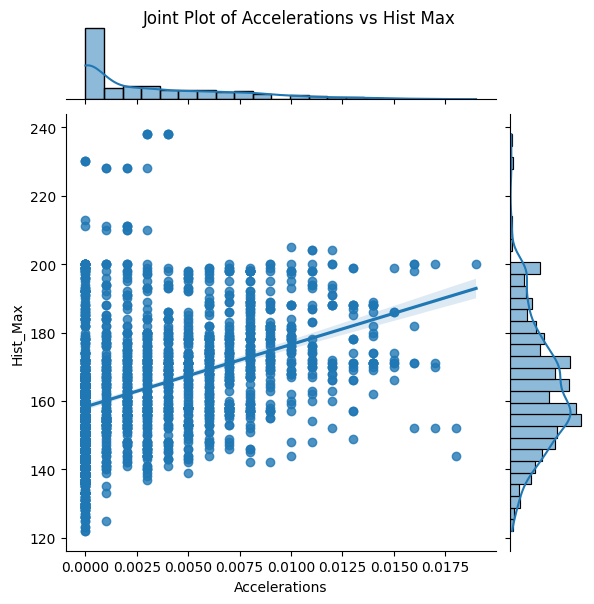

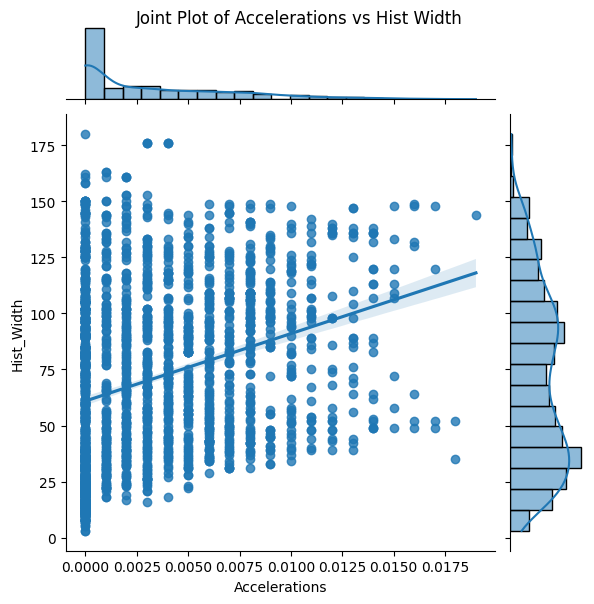

In [18]:
# Joint plot for Accelerations vs Hist_Max
sns.jointplot(x=CTG['Accelerations'], y=CTG['Hist_Max'], kind='reg')
plt.suptitle('Joint Plot of Accelerations vs Hist Max', y=1)
plt.show()

# Joint plot for Accelerations vs Hist_Width
sns.jointplot(x=CTG['Accelerations'], y=CTG['Hist_Width'], kind='reg')
plt.suptitle('Joint Plot of Accelerations vs Hist Width', y=1)
plt.show()

In [19]:
# Independent and dependent variables for regression analysis and adding constants
X_max = CTG['Accelerations']
y_max = CTG['Hist_Max']
X_max = sm.add_constant(X_max)

X_width = CTG['Accelerations']
y_width = CTG['Hist_Width']
X_width = sm.add_constant(X_width)

# Defining Models
model_max = sm.OLS(y_max, X_max).fit()
model_width = sm.OLS(y_width, X_width).fit()

print(model_max.summary())
print(model_width.summary())

                            OLS Regression Results                            
Dep. Variable:               Hist_Max   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     386.0
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           4.66e-79
Time:                        03:21:59   Log-Likelihood:                -8929.7
No. Observations:                2115   AIC:                         1.786e+04
Df Residuals:                    2113   BIC:                         1.787e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           158.2798      0.465    340.469

In [20]:
# Partial correlation between Accelerations and Hist_Max (controlling for Hist_Width)
partial_corr_max = pg.partial_corr(data=CTG, x='Accelerations', y='Hist_Max', covar=['Hist_Width'])
print("Partial correlation between Accelerations and Hist_Max:")
print(partial_corr_max)

# Partial correlation between Accelerations and Hist_Width (controlling for Hist_Max)
partial_corr_width = pg.partial_corr(data=CTG, x='Accelerations', y='Hist_Width', covar=['Hist_Max'])
print("\nPartial correlation between Accelerations and Hist_Width:")
print(partial_corr_width)

Partial correlation between Accelerations and Hist_Max:
            n         r         CI95%         p-val
pearson  2115  0.270426  [0.23, 0.31]  9.480011e-37

Partial correlation between Accelerations and Hist_Width:
            n         r         CI95%     p-val
pearson  2115  0.039743  [-0.0, 0.08]  0.067708


## Abnormal STV Percent vs STV Mean

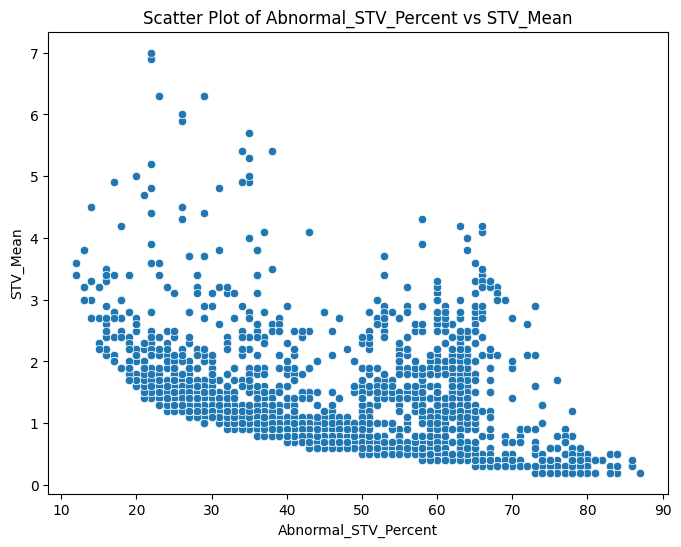

                            OLS Regression Results                            
Dep. Variable:               STV_Mean   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     476.6
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.91e-95
Time:                        00:40:23   Log-Likelihood:                -2525.0
No. Observations:                2115   AIC:                             5054.
Df Residuals:                    2113   BIC:                             5065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3721 

In [108]:
# Scatter plot for Abnormal_STV_Percent vs STV_Mean
plt.figure(figsize=(8, 6))
sns.scatterplot(x=CTG['Abnormal_STV_Percent'], y=CTG['STV_Mean'])
plt.title('Scatter Plot of Abnormal_STV_Percent vs STV_Mean')
plt.xlabel('Abnormal_STV_Percent')
plt.ylabel('STV_Mean')
plt.show()

# Independent and dependent variables for regression analysis
X = CTG['Abnormal_STV_Percent']
y = CTG['STV_Mean']

# Adding a constant and defining the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())


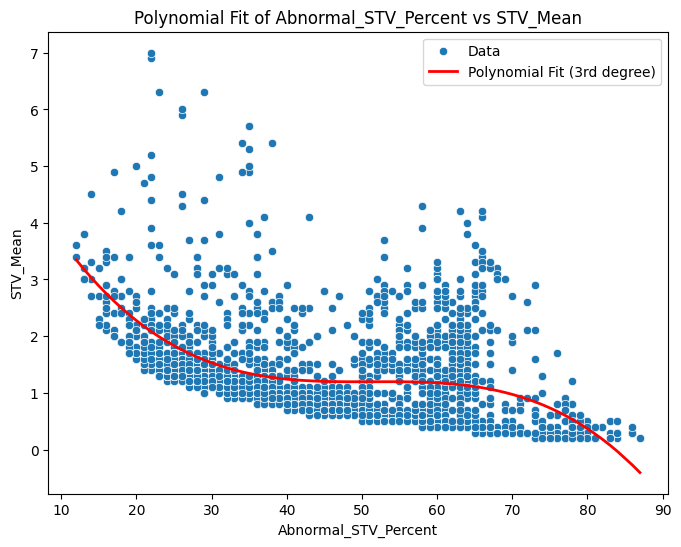

Mean Squared Error (MSE): 0.5912
R-squared (R²): 0.2434


In [110]:

# Define third-degree polynomial function
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Prepare and sort data
x_data = np.array(CTG['Abnormal_STV_Percent'])
y_data = np.array(CTG['STV_Mean'])
sorted_indices = np.argsort(x_data)
x_data_sorted = x_data[sorted_indices]
y_data_sorted = y_data[sorted_indices]

# Fit third-degree polynomial model
popt, pcov = curve_fit(poly_func, x_data_sorted, y_data_sorted)

# Predicted y values
y_fit = poly_func(x_data_sorted, *popt)

# Plotting the graph
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_data, y=y_data, label='Data')
plt.plot(x_data_sorted, y_fit, color='red', label='Polynomial Fit (3rd degree)', linewidth=2)
plt.title('Polynomial Fit of Abnormal_STV_Percent vs STV_Mean')
plt.xlabel('Abnormal_STV_Percent')
plt.ylabel('STV_Mean')
plt.legend()
plt.show()

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_data_sorted, y_fit)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared (R²)
r2 = r2_score(y_data_sorted, y_fit)
print(f"R-squared (R²): {r2:.4f}")

## Fetal State and Prolonged Decels

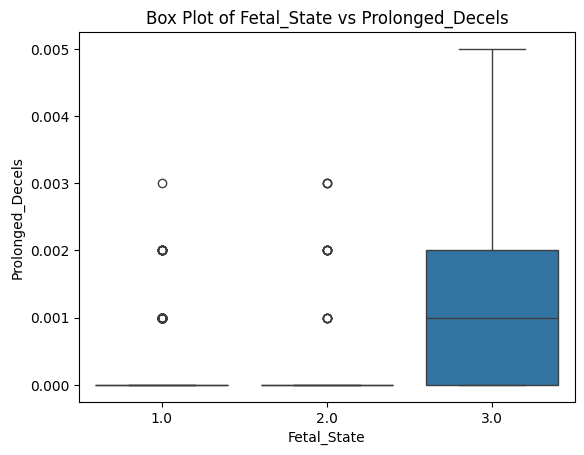

In [25]:
# Boxplot for Prolonged_Decels vs Fetal_State
sns.boxplot(x=CTG['Fetal_State'], y=CTG['Prolonged_Decels'])
plt.title('Box Plot of Fetal_State vs Prolonged_Decels')
plt.xlabel('Fetal_State')
plt.ylabel('Prolonged_Decels')
plt.show()

In [26]:
# Independent and dependent variables for regression analysis
X = CTG['Prolonged_Decels']
y = CTG['Fetal_State']
# Adding a constant and defining the model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Fetal_State   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     656.3
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.83e-126
Time:                        03:22:00   Log-Likelihood:                -1683.1
No. Observations:                2115   AIC:                             3370.
Df Residuals:                    2113   BIC:                             3382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2230      0.012  

In [27]:
print(CTG)

      FHR_Baseline  Accelerations  Fetal_Movements  Uterine_Contractions  \
0            120.0          0.000            0.000                 0.000   
1            132.0          0.006            0.000                 0.006   
2            133.0          0.003            0.000                 0.008   
3            134.0          0.003            0.000                 0.008   
4            132.0          0.007            0.000                 0.008   
...            ...            ...              ...                   ...   
2110         140.0          0.000            0.000                 0.007   
2111         140.0          0.001            0.000                 0.007   
2112         140.0          0.001            0.000                 0.007   
2113         140.0          0.001            0.000                 0.006   
2114         142.0          0.002            0.002                 0.008   

      Light_Decels  Severe_Decels  Prolonged_Decels  Abnormal_STV_Percent  \
0         

 ## Feature Combinations and Removal of Columns

In [29]:
# Feature Combination
# Create a new feature 'Hist_Avg' by averaging 'Hist_Mean', 'Hist_Median', and 'Hist_Mode'
CTG['Hist_Avg'] = CTG[['Hist_Mean', 'Hist_Median', 'Hist_Mode']].mean(axis=1)

# Create a new feature 'Hist_Product' by multiplying 'Hist_Mean', 'Hist_Median', and 'Hist_Mode'
CTG['Hist_Product'] = CTG['Hist_Mean'] * CTG['Hist_Median'] * CTG['Hist_Mode']

# Scale the newly created features 'Hist_Avg' and 'Hist_Product'
scaler = StandardScaler()
CTG[['Hist_Avg','Hist_Product']] = scaler.fit_transform(CTG[['Hist_Avg','Hist_Product']])

print(CTG)


      FHR_Baseline  Accelerations  Fetal_Movements  Uterine_Contractions  \
0            120.0          0.000            0.000                 0.000   
1            132.0          0.006            0.000                 0.006   
2            133.0          0.003            0.000                 0.008   
3            134.0          0.003            0.000                 0.008   
4            132.0          0.007            0.000                 0.008   
...            ...            ...              ...                   ...   
2110         140.0          0.000            0.000                 0.007   
2111         140.0          0.001            0.000                 0.007   
2112         140.0          0.001            0.000                 0.007   
2113         140.0          0.001            0.000                 0.006   
2114         142.0          0.002            0.002                 0.008   

      Light_Decels  Severe_Decels  Prolonged_Decels  Abnormal_STV_Percent  \
0         

In [30]:
# Drop the columns that are highly correlated with each other
CTG.drop(columns=["Hist_Mode", "Hist_Mean", "Hist_Median"])

,FHR_Baseline,Accelerations,Fetal_Movements,Uterine_Contractions,Light_Decels,Severe_Decels,Prolonged_Decels,Abnormal_STV_Percent,STV_Mean,Abnormal_LTV_Percent,LTV_Mean,Hist_Width,Hist_Min,Hist_Max,Hist_Peaks,Hist_Zeros,Hist_Variance,Hist_Tendency,FHR_Class,Fetal_State,Hist_Avg,Hist_Product
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,73.0,1.0,9.0,2.0,-0.709636,-0.802180
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,12.0,0.0,6.0,1.0,0.151771,0.050521
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,13.0,0.0,6.0,1.0,0.085509,-0.020366
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,13.0,1.0,6.0,1.0,-0.047015,-0.157436
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,11.0,1.0,2.0,1.0,0.019247,-0.088560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,2.0,0.0,5.0,2.0,0.991091,1.036092
2111,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,3.0,1.0,5.0,2.0,0.902741,0.923889
2112,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,4.0,1.0,5.0,2.0,0.946916,0.979059
2113,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,4.0,1.0,5.0,2.0,0.880654,0.895746


In [31]:
# Create a dictionary to compare correlations with Fetal_State
corr_dict = corr_matrix["Fetal_State"].to_dict()

# Identify columns with an absolute correlation less than 0.05
drop_cols = [key for key, value in corr_dict.items() if abs(value) < 0.05]
print(f"Columns to be dropped: {drop_cols}")

Columns to be dropped: ['Hist_Max', 'Hist_Peaks', 'Hist_Zeros']


In [32]:
# Drop the columns that had near to no effect on the dataset
CTG = CTG.drop(columns=drop_cols)
print(f"New dataset dimensions: {CTG.shape}")

New dataset dimensions: (2115, 22)


In [33]:
# Save the modified CTG DataFrame to a new CSV file
CTG.to_csv('data/after_EDA_CTG_dataset.csv', index=False)